# Severe Weather Capstone - Pre-processing

Greg Welliver   

In [1]:
# Import relevant libraries and packages.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.ticker as plticker
import seaborn as sns
sns.set()
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing 
import warnings
from scipy import stats
import matplotlib as mpl
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
%matplotlib inline


import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from scipy import stats

from sklearn import linear_model, preprocessing, tree, svm, datasets, metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score, auc, mean_squared_error, r2_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder as OHE
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import xgboost
from xgboost import XGBClassifier
import warnings
from subprocess import call
from IPython.display import Image
from datetime import datetime, timedelta, date
import os
import plotly.graph_objects as go
import itertools
from io import StringIO  
import pydotplus

# Seaborn settings
sns.set_context('notebook')
#sns.set_style("whitegrid")
#sns.set_style("white")
style_set = sns.set_style('whitegrid')
pd.options.display.float_format = '{:,}'.format
color_choice1 = 'plum'
color_choice2 = 'lightblue'
color_choice3 = 'lightgreen'
#ax.yaxis.set_major_formatter('{x:,.0f}')
#sns.set_context('notebook', font_scale = 4)


%matplotlib inline
import pandas as pd
#from mpl_toolkits.basemap import Basemap


import geopandas as gpd
from shapely.geometry import Point, Polygon
import contextily as ctx

from sklearn.feature_extraction.text import CountVectorizer


## Load the data



In [2]:
# load data
df = pd.read_parquet("../Data/all_storm_data11.pqt")
#df = pd.read_csv("../Data/all_storm_data4.csv")

In [3]:
df.head(40).T

0   \
BEGIN_YEARMONTH                                               202202   
BEGIN_TIME                                                      2118   
STATE                                                         NEVADA   
YEAR                                                            2022   
MONTH_NAME                                                  February   
EVENT_TYPE                                                 High Wind   
BEGIN_DATE_TIME                                  2022-02-20 21:18:00   
INJURIES_DIRECT                                                    0   
INJURIES_INDIRECT                                                  0   
DEATHS_DIRECT                                                      0   
DEATHS_INDIRECT                                                    0   
DAMAGE_PROPERTY                                                  0.0   
MAGNITUDE                                                       36.0   
MAGNITUDE_TYPE                                                    MS   
FLOOD_CAUSE                                                     None   
TOR_F_SCALE                                                     None   
TOR_LENGTH                                                       0.0   
TOR_WIDTH                                                        0.0   
BEGIN_LAT                                                        NaN   
BEGIN_LON                                                        NaN   
EPISODE_NARRATIVE  Strong winds increased ahead of an approaching...   
EVENT_NARRATIVE    Station (UP994) 3.1 SE West Wendover, Elevatio...   
ST_CT_FIPS                                                     32033   
DURATION                                                        60.0   
STORM_AREA                                                       NaN   
PopDensity                                              0.4236221825   
Population                                                   9,078.0   
HPI                                                         34,169.0   

                                                                  1   \
BEGIN_YEARMONTH                                               202202   
BEGIN_TIME                                                       800   
STATE                                                         NEVADA   
YEAR                                                            2022   
MONTH_NAME                                                  February   
EVENT_TYPE                                                Heavy Snow   
BEGIN_DATE_TIME                                  2022-02-21 08:00:00   
INJURIES_DIRECT                                                    0   
INJURIES_INDIRECT                                                  0   
DEATHS_DIRECT                                                      0   
DEATHS_INDIRECT                                                    0   
DAMAGE_PROPERTY                                                  0.0   
MAGNITUDE                                                        0.0   
MAGNITUDE_TYPE                                                  None   
FLOOD_CAUSE                                                     None   
TOR_F_SCALE                                                     None   
TOR_LENGTH                                                       0.0   
TOR_WIDTH                                                        0.0   
BEGIN_LAT                                                        NaN   
BEGIN_LON                                                        NaN   
EPISODE_NARRATIVE  A low centered over northern and central Nevad...   
EVENT_NARRATIVE    Thirteen inches fell at station (BCSN2) Big Cr...   
ST_CT_FIPS                                                     32037   
DURATION                                                     1,560.0   
STORM_AREA                                                       NaN   
PopDensity                                                       NaN   
Population                       

In [4]:
# remove columns that won't have any predictive value
df = df.drop(['ST_CT_FIPS', 'EVENT_NARRATIVE', 'EPISODE_NARRATIVE', 'BEGIN_LON', 'BEGIN_LAT', 'BEGIN_DATE_TIME', 'MONTH_NAME', 'YEAR', 'BEGIN_YEARMONTH', 'MAGNITUDE_TYPE', 'TOR_F_SCALE'], axis=1)

In [5]:
# drop columns that have a lot of missing values
df = df.drop(['FLOOD_CAUSE', 'INJURIES_DIRECT', 'INJURIES_INDIRECT'], axis=1)

## part 2 of dropping columns

In [6]:
df = df.drop(['BEGIN_TIME', 'STATE', 'Population'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555647 entries, 0 to 1555646
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   EVENT_TYPE       1555647 non-null  object 
 1   DEATHS_DIRECT    1555647 non-null  int64  
 2   DEATHS_INDIRECT  1555647 non-null  int64  
 3   DAMAGE_PROPERTY  1555647 non-null  float64
 4   MAGNITUDE        1555647 non-null  float64
 5   TOR_LENGTH       1555647 non-null  float64
 6   TOR_WIDTH        1555647 non-null  float64
 7   DURATION         1555647 non-null  float64
 8   STORM_AREA       916584 non-null   float64
 9   PopDensity       1035753 non-null  float64
 10  HPI              1051529 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 142.4+ MB


In [8]:
df.DAMAGE_PROPERTY.value_counts()

0.0              1208379
5,000.0            44298
1,000.0            42880
10,000.0           37586
2,000.0            30523
                  ...   
124,000,000.0          1
1,710,000.0            1
3,850.0                1
81,000,000.0           1
322,200.0              1
Name: DAMAGE_PROPERTY, Length: 2060, dtype: int64

In [9]:
len(df)

1555647

In [10]:
#df = df[df['DAMAGE_PROPERTY'] > 0]

In [11]:
len(df)

1555647

In [12]:
df = df.sort_values(by=['DAMAGE_PROPERTY'], ascending=False)


In [13]:
df = df[300:]

In [14]:
len(df)

1555347

In [15]:
df.head(10)

EVENT_TYPE  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  \
161053   Hurricane (Typhoon)              0                0    260,000,000.0   
395014           Flash Flood              0                0    253,380,000.0   
244847        Tropical Storm              0                0    252,000,000.0   
341594               Tornado             11                0    250,000,000.0   
1089201          Flash Flood              0                0    250,000,000.0   
1143747            Hurricane              0                1    250,000,000.0   
836450      Storm Surge/Tide              0                0    250,000,000.0   
836517             Hurricane              1                0    250,000,000.0   
1489556  Hurricane (Typhoon)              0                0    250,000,000.0   
233782             Hurricane              0                2    250,000,000.0   

         MAGNITUDE  TOR_LENGTH  TOR_WIDTH  DURATION           STORM_AREA  \
161053         0.0         0.0        0.0   1,440.0                  NaN   
395014         0.0         0.0        0.0     313.0  0.42020000000000124   
244847         0.0         0.0        0.0   1,380.0                  NaN   
341594         0.0        25.8    3,000.0      62.0  0.23089999999999833   
1089201        0.0         0.0        0.0   2,046.0 0.050200000000000244   
1143747        0.0         0.0        0.0   1,080.0                  NaN   
836450         0.0         0.0        0.0   1,440.0                  NaN   
836517         0.0         0.0        0.0   1,440.0                  NaN   
1489556        0.0         0.0        0.0     930.0                  NaN   
233782         0.0         0.0        0.0   1,440.0                  NaN   

          PopDensity      HPI  
161053           NaN      NaN  
395014  2,134.420727  4,964.0  
244847    39.7352873 15,677.0  
341594           NaN      NaN  
1089201          NaN      NaN  
1143747          NaN      NaN  
836450           NaN      NaN  
836517           NaN 28,168.0  
1489556  19.46233744 15,662.0  
233782           NaN      NaN

In [16]:
df['DAMAGE_PROPERTY'].describe()

count            1,555,347.0
mean      93,051.50579902748
std     2,580,890.8044861564
min                      0.0
25%                      0.0
50%                      0.0
75%                      0.0
max            260,000,000.0
Name: DAMAGE_PROPERTY, dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1555347 entries, 161053 to 1555646
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   EVENT_TYPE       1555347 non-null  object 
 1   DEATHS_DIRECT    1555347 non-null  int64  
 2   DEATHS_INDIRECT  1555347 non-null  int64  
 3   DAMAGE_PROPERTY  1555347 non-null  float64
 4   MAGNITUDE        1555347 non-null  float64
 5   TOR_LENGTH       1555347 non-null  float64
 6   TOR_WIDTH        1555347 non-null  float64
 7   DURATION         1555347 non-null  float64
 8   STORM_AREA       916476 non-null   float64
 9   PopDensity       1035630 non-null  float64
 10  HPI              1051357 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 142.4+ MB


In [18]:
# fill storm area nulls with zero
#df['STORM_AREA'] = df['STORM_AREA'].fillna(0)

In [19]:
df.head(30)

EVENT_TYPE  DEATHS_DIRECT  DEATHS_INDIRECT  DAMAGE_PROPERTY  \
161053   Hurricane (Typhoon)              0                0    260,000,000.0   
395014           Flash Flood              0                0    253,380,000.0   
244847        Tropical Storm              0                0    252,000,000.0   
341594               Tornado             11                0    250,000,000.0   
1089201          Flash Flood              0                0    250,000,000.0   
1143747            Hurricane              0                1    250,000,000.0   
836450      Storm Surge/Tide              0                0    250,000,000.0   
836517             Hurricane              1                0    250,000,000.0   
1489556  Hurricane (Typhoon)              0                0    250,000,000.0   
233782             Hurricane              0                2    250,000,000.0   
233245      Storm Surge/Tide              0                0    250,000,000.0   
1446587            Hurricane              0                0    250,000,000.0   
233246      Storm Surge/Tide              0                0    250,000,000.0   
1494948  Hurricane (Typhoon)              0                0    250,000,000.0   
836451      Storm Surge/Tide              0                0    250,000,000.0   
169793             High Wind              0                0    250,000,000.0   
1178420              Tornado              0                0    250,000,000.0   
917748                  Hail              0                0    250,000,000.0   
836987             Hurricane              0                2    250,000,000.0   
1203262             Wildfire              2                0    250,000,000.0   
1263226          Flash Flood              2                0    250,000,000.0   
467492                 Flood              0                0    250,000,000.0   
916653             High Wind              0                0    250,000,000.0   
458370             Hurricane              0                0    250,000,000.0   
425567               Tornado              0                0    250,000,000.0   
1202243              Drought              0                0    250,000,000.0   
233312             Hurricane              1                0    250,000,000.0   
323239               Tornado              9                0    250,000,000.0   
1446456            Hurricane              0                4    250,000,000.0   
49310                  Flood              1                0    245,000,000.0   

         MAGNITUDE  TOR_LENGTH  TOR_WIDTH  DURATION            STORM_AREA  \
161053         0.0         0.0        0.0   1,440.0                   NaN   
395014         0.0         0.0        0.0     313.0   0.42020000000000124   
244847         0.0         0.0        0.0   1,380.0                   NaN   
341594         0.0        25.8    3,000.0      62.0   0.23089999999999833   
1089201        0.0         0.0        0.0   2,046.0  0.050200000000000244   
1143747        0.0         0.0        0.0   1,080.0                   NaN   
836450         0.0         0.0        0.0   1,440.0                   NaN   
836517         0.0         0.0        0.0   1,440.0                   NaN   
1489556        0.0         0.0        0.0     930.0                   NaN   
233782         0.0         0.0        0.0   1,440.0                   NaN   
233245         0.0         0.0        0.0   1,440.0                   NaN   
1446587        0.0         0.0        0.0     180.0                   NaN   
233246         0.0         0.0        0.0   1,440.0                   NaN   
1494948        0.0         0.0        0.0   3,240.0                   NaN   
836451         0.0         0.0        0.0   1,440.0                   NaN   
169793        50.0         0.0        0.0   1,620.0                   NaN   
1178420        0.0       15.39      880.0      23.0  0.009599999999998943   
917748        2.75         0.0        0.0       0.0                   0.0   
836987         0.0         0.0        0.0  

In [20]:
df.shape

(1555347, 11)

In [21]:
df.isna().sum().sum()


1662578

In [22]:
# drop rows with null values
df = df.dropna(axis=0).reset_index()
df = df.drop(['index'], axis=1)
# y_train = y_train.dropna(axis=0)
# y_test = y_test.dropna(axis=0)

In [23]:
df.shape

(754724, 11)

In [24]:
# when including storm size fill to zero
1011673

1011673

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754724 entries, 0 to 754723
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   EVENT_TYPE       754724 non-null  object 
 1   DEATHS_DIRECT    754724 non-null  int64  
 2   DEATHS_INDIRECT  754724 non-null  int64  
 3   DAMAGE_PROPERTY  754724 non-null  float64
 4   MAGNITUDE        754724 non-null  float64
 5   TOR_LENGTH       754724 non-null  float64
 6   TOR_WIDTH        754724 non-null  float64
 7   DURATION         754724 non-null  float64
 8   STORM_AREA       754724 non-null  float64
 9   PopDensity       754724 non-null  float64
 10  HPI              754724 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 63.3+ MB


## Create dummy variables for categorical data types

In [26]:
# isolate categorical variables
categorical_features = df.select_dtypes(include=['object'])

In [27]:
df = pd.concat([df.drop(categorical_features, axis=1), pd.get_dummies(categorical_features)], axis=1)

### Split data into training and testing subsets

In [28]:
# Create the X and y matrices from the dataframe
X = df.drop(columns = ['DAMAGE_PROPERTY'])
y = df['DAMAGE_PROPERTY']

In [29]:
# from sklearn.model_selection import train_test_split; reserve 20% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1234)

In [30]:
#X_train.isna().sum().sum()

## Scaling and Transforming Numeric Features

In [31]:
# Create subset of only the numeric columns
numeric_df = df.select_dtypes(include=['int', 'float'])
numeric_df = numeric_df.drop(columns = ['DAMAGE_PROPERTY'])

In [32]:
numeric_column_names = list(numeric_df.columns)

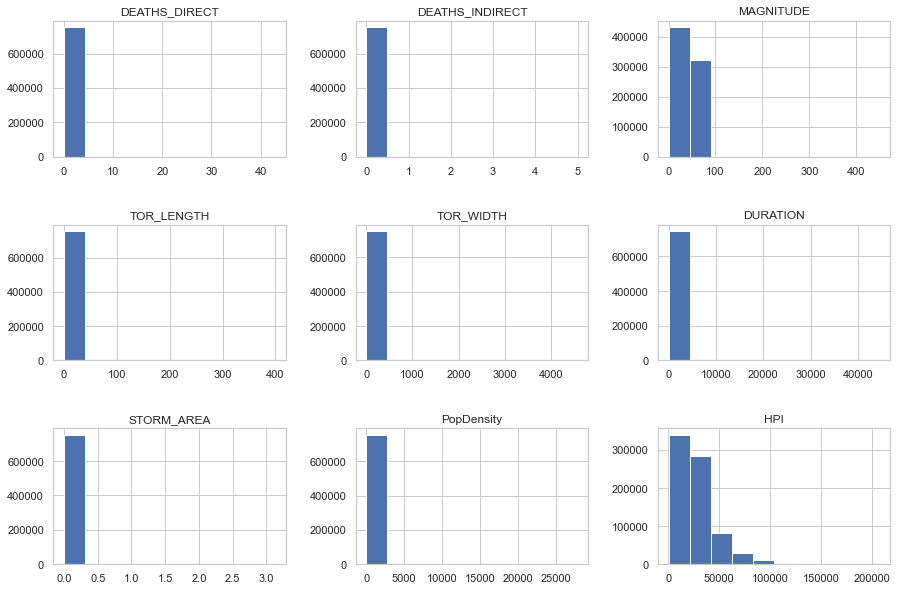

In [33]:
# let's look at the distribution of numeric variables
numeric_df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

In [34]:
# isolate numeric features of X_train and X_test
numeric_df_X_train = X_train.select_dtypes(include=['int', 'float'])
numeric_df_X_test = X_test.select_dtypes(include=['int', 'float'])

In [35]:
#numeric_df_X_test.isna().sum().sum()

### Let's try standardize features with StandardScaler
- Less sensitive to outliers (we know we have a number of significant outliers)


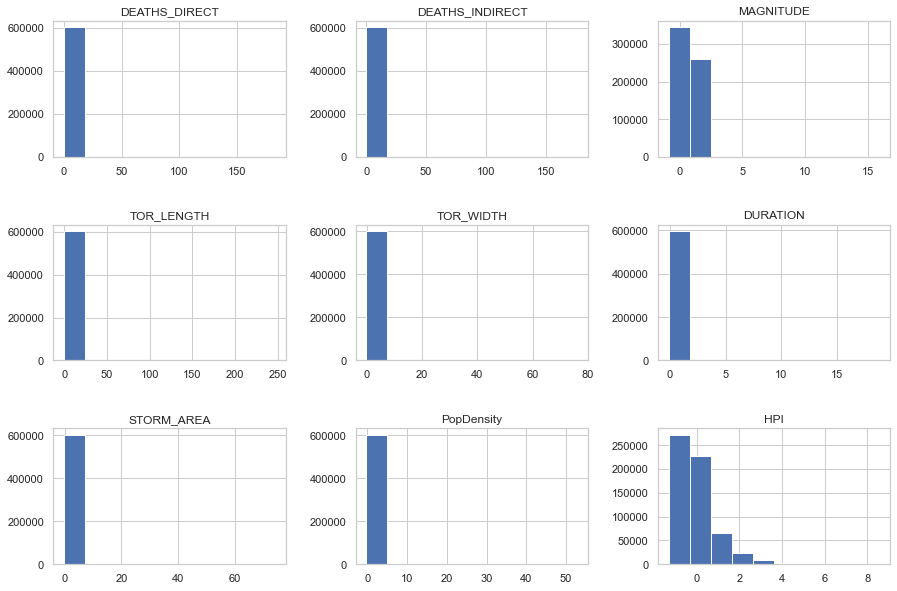

In [36]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# create model, fit, and transform
SS_scaler = StandardScaler()
numeric_df_ss_X_train = SS_scaler.fit_transform(numeric_df_X_train)
numeric_df_ss_X_test = SS_scaler.fit_transform(numeric_df_X_test)

# convert back to dataframe for plotting
numeric_df_ss_X_train = pd.DataFrame(numeric_df_ss_X_train)
numeric_df_ss_X_train.columns = numeric_column_names
numeric_df_ss_X_test = pd.DataFrame(numeric_df_ss_X_test)
numeric_df_ss_X_test.columns = numeric_column_names

numeric_df_ss_X_train.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

#### Update numeric column values with the Standardized values

In [37]:
# reset index
X_train = X_train.reset_index()
# drop extra column
X_train = X_train.drop(['index'], axis=1)

In [38]:
X_test = X_test.reset_index()
X_test = X_test.drop(['index'], axis=1)

In [39]:
for column_name in numeric_column_names:
    X_train[column_name] = numeric_df_ss_X_train[column_name]

In [40]:
for column_name in numeric_column_names:
    X_test[column_name] = numeric_df_ss_X_test[column_name]

In [41]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

### Look at correlation matrix to see if relationships are still preserved after transformations

In [42]:
df2 = X

In [43]:
df2.head()

DEATHS_DIRECT       DEATHS_INDIRECT           MAGNITUDE  \
0 -0.035059527132752254 -0.018878610620558046  0.9798404966672607   
1 -0.035059527132752254 -0.018878610620558046 -0.8549361453040357   
2 -0.035059527132752254 -0.018878610620558046  0.9798404966672607   
3 -0.035059527132752254 -0.018878610620558046 -0.8923805665687561   
4 -0.035059527132752254 -0.018878610620558046   1.354284709314464   

            TOR_LENGTH            TOR_WIDTH             DURATION  \
0 -0.09822135773161975 -0.10399034113221842 -0.11316351030623525   
1 -0.09822135773161975 -0.10399034113221842  -0.1118901552241043   
2 -0.09822135773161975 -0.10399034113221842 -0.11316351030623525   
3 -0.09822135773161975 -0.10399034113221842 -0.07368950276017575   
4 -0.09822135773161975 -0.10399034113221842 -0.11316351030623525   

            STORM_AREA            PopDensity                  HPI  \
0 -0.21646173683408448 -0.024662474698362056   1.3796246969189927   
1 -0.21646173683408448  -0.23500116654877368  -0.6318607336886813   
2 -0.21646173683408448  -0.16472307496954042   0.5517814332498446   
3 -0.04801462217116772  -0.17548467469381893  -0.5414316937617136   
4 -0.21646173683408448  -0.21686218841229082 -0.28350612077740733   

   EVENT_TYPE_Debris Flow  ...  EVENT_TYPE_Flash Flood  EVENT_TYPE_Flood  \
0                       0  ...                       0                 0   
1                       0  ...                       0                 0   
2                       0  ...                       0                 0   
3                       0  ...                       1                 0   
4                       0  ...                       0                 0   

   EVENT_TYPE_Funnel Cloud  EVENT_TYPE_Hail  EVENT_TYPE_Heavy Rain  \
0                        0                0                      0   
1                        0                1                      0   
2                        0                0                      0   
3                        0                0                      0   
4                        0                0                      0   

   EVENT_TYPE_High Wind  EVENT_TYPE_Lightning  EVENT_TYPE_Thunderstorm Wind  \
0                     0                     0                             1   
1                     0                     0                             0   
2                     0                     0                             1   
3                     0                     0                             0   
4                     0                     0                             1   

   EVENT_TYPE_Tornado  EVENT_TYPE_Waterspout  
0                   0                      0  
1                   0                      0  
2                   0                      0  
3                   0                      0  
4                   0                      0  

[5 rows x 24 columns]

In [44]:
df2['DAMAGE_PROPERTY'] = y

In [45]:
df2.head()

DEATHS_DIRECT       DEATHS_INDIRECT           MAGNITUDE  \
0 -0.035059527132752254 -0.018878610620558046  0.9798404966672607   
1 -0.035059527132752254 -0.018878610620558046 -0.8549361453040357   
2 -0.035059527132752254 -0.018878610620558046  0.9798404966672607   
3 -0.035059527132752254 -0.018878610620558046 -0.8923805665687561   
4 -0.035059527132752254 -0.018878610620558046   1.354284709314464   

            TOR_LENGTH            TOR_WIDTH             DURATION  \
0 -0.09822135773161975 -0.10399034113221842 -0.11316351030623525   
1 -0.09822135773161975 -0.10399034113221842  -0.1118901552241043   
2 -0.09822135773161975 -0.10399034113221842 -0.11316351030623525   
3 -0.09822135773161975 -0.10399034113221842 -0.07368950276017575   
4 -0.09822135773161975 -0.10399034113221842 -0.11316351030623525   

            STORM_AREA            PopDensity                  HPI  \
0 -0.21646173683408448 -0.024662474698362056   1.3796246969189927   
1 -0.21646173683408448  -0.23500116654877368  -0.6318607336886813   
2 -0.21646173683408448  -0.16472307496954042   0.5517814332498446   
3 -0.04801462217116772  -0.17548467469381893  -0.5414316937617136   
4 -0.21646173683408448  -0.21686218841229082 -0.28350612077740733   

   EVENT_TYPE_Debris Flow  ...  EVENT_TYPE_Flood  EVENT_TYPE_Funnel Cloud  \
0                       0  ...                 0                        0   
1                       0  ...                 0                        0   
2                       0  ...                 0                        0   
3                       0  ...                 0                        0   
4                       0  ...                 0                        0   

   EVENT_TYPE_Hail  EVENT_TYPE_Heavy Rain  EVENT_TYPE_High Wind  \
0                0                      0                     0   
1                1                      0                     0   
2                0                      0                     0   
3                0                      0                     0   
4                0                      0                     0   

   EVENT_TYPE_Lightning  EVENT_TYPE_Thunderstorm Wind  EVENT_TYPE_Tornado  \
0                     0                             1                   0   
1                     0                             0                   0   
2                     0                             1                   0   
3                     0                             0                   0   
4                     0                             1                   0   

   EVENT_TYPE_Waterspout  DAMAGE_PROPERTY  
0                      0    253,380,000.0  
1                      0    250,000,000.0  
2                      0    250,000,000.0  
3                      0    250,000,000.0  
4                      0    245,000,000.0  

[5 rows x 25 columns]

In [46]:
# before dropping columns # df2_corr = df2[['BEGIN_TIME','DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'DURATION', 'STORM_AREA', 'PopDensity', 'Population', 'HPI']]
df2_corr = df2[['DEATHS_DIRECT', 'DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'MAGNITUDE', 'TOR_LENGTH', 'TOR_WIDTH', 'DURATION', 'STORM_AREA', 'PopDensity', 'Population', 'HPI']]

KeyError: "['Population'] not in index"

In [ ]:
corrmat = df2_corr.corr()
f, ax = plt.subplots(figsize=(12, 9))
hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap='magma',fmt='.2f',
                 linewidths=.05)
#hm = sns.heatmap(round(corrmat,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
#                 linewidths=.05)

f.subplots_adjust(top=0.93)
#t= f.suptitle('Match Data Feature Correlation for all USA matches', fontsize=14)

Looks like the relationships are largely in tact

In [ ]:
# convert y_test and y_train to dataframes so they can be written to file
y_test = pd.DataFrame(y_test)
y_train = pd.DataFrame(y_train)

#### write to parquest - 4 files

In [ ]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/X_train.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_train.to_parquet(filepath)

In [ ]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/X_test.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_parquet(filepath)

In [ ]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/y_train.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_train.to_parquet(filepath)

In [ ]:
from pathlib import Path  
filepath = Path('/Users/gregwelliver/Desktop/springboard_files/Severe-Weather-Repo/Data/y_test.pqt')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
y_test.to_parquet(filepath)